In [8]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [10]:
%autoreload
from pathlib import Path
import sys
root = Path().resolve().absolute().parent.parent
print(root)
sys.path.append(str(root))

from src.pipeline import Pipeline, BuilingIdsEnum
pipe = Pipeline()



/Users/matsalexander/Desktop/SolarEnergyImpact


In [11]:
building_a = pipe.get_data(BuilingIdsEnum.A)
building_b = pipe.get_data(BuilingIdsEnum.B)
building_c = pipe.get_data(BuilingIdsEnum.C)

# remove from 3. to 7. july 2024 from dataset A
mask = (building_a['timestamp'] >= '2024-07-03') & (building_a['timestamp'] <= '2024-07-07')
building_a = building_a[~mask]

combined_df = pd.concat([building_a, building_b, building_c])
# reset index
combined_df = combined_df.reset_index(drop=True)
# Perform the train-test split with stratification based on 'building_id'
train_data0, test_data0 = train_test_split(
    combined_df,
    test_size=0.20,
    random_state=42,
    stratify=combined_df['building']
)

# select features
features = ["timestamp", "area", "temperature", "wind_speed", "cloud_fraction", "precipitation"]
target = "value_import"

train_data = train_data0[features + [target]]
test_data = test_data0[features + [target]]



In [ ]:

# Train the model using AutoGluon
predictor = TabularPredictor(label=target, eval_metric='mean_absolute_error').fit(
    train_data, 
    presets='best_quality',
    excluded_model_types=['KNN']
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20241109_185606"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       13.88 GB / 32.00 GB (43.4%)
Disk Space Avail:   618.51 GB / 926.35 GB (66.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

[1000]	valid_set's l1: 5.92006
[2000]	valid_set's l1: 5.66781
[3000]	valid_set's l1: 5.51892
[4000]	valid_set's l1: 5.41641
[5000]	valid_set's l1: 5.34046
[6000]	valid_set's l1: 5.27797
[7000]	valid_set's l1: 5.22588
[8000]	valid_set's l1: 5.18609
[9000]	valid_set's l1: 5.15965
[10000]	valid_set's l1: 5.13844
[1000]	valid_set's l1: 5.89552
[2000]	valid_set's l1: 5.64629
[3000]	valid_set's l1: 5.50757
[4000]	valid_set's l1: 5.412
[5000]	valid_set's l1: 5.34405
[6000]	valid_set's l1: 5.28655


	Ran out of time, early stopping on iteration 6791. Best iteration is:
	[6790]	valid_set's l1: 5.2483


[1000]	valid_set's l1: 5.89883
[2000]	valid_set's l1: 5.62877
[3000]	valid_set's l1: 5.47533
[4000]	valid_set's l1: 5.36764
[5000]	valid_set's l1: 5.29681


	Ran out of time, early stopping on iteration 5428. Best iteration is:
	[5428]	valid_set's l1: 5.2738


[1000]	valid_set's l1: 5.88329
[2000]	valid_set's l1: 5.59633
[3000]	valid_set's l1: 5.43578
[4000]	valid_set's l1: 5.34148
[5000]	valid_set's l1: 5.27177


	Ran out of time, early stopping on iteration 5509. Best iteration is:
	[5509]	valid_set's l1: 5.2461


[1000]	valid_set's l1: 6.10396
[2000]	valid_set's l1: 5.84863
[3000]	valid_set's l1: 5.69724
[4000]	valid_set's l1: 5.59013
[5000]	valid_set's l1: 5.5203


	Ran out of time, early stopping on iteration 5705. Best iteration is:
	[5700]	valid_set's l1: 5.48101


[1000]	valid_set's l1: 5.95494
[2000]	valid_set's l1: 5.6501
[3000]	valid_set's l1: 5.48205
[4000]	valid_set's l1: 5.36771
[5000]	valid_set's l1: 5.29249
[6000]	valid_set's l1: 5.23835


	Ran out of time, early stopping on iteration 6300. Best iteration is:
	[6294]	valid_set's l1: 5.22655


[1000]	valid_set's l1: 5.98599
[2000]	valid_set's l1: 5.72767
[3000]	valid_set's l1: 5.58269
[4000]	valid_set's l1: 5.47704
[5000]	valid_set's l1: 5.4014


	Ran out of time, early stopping on iteration 5903. Best iteration is:
	[5893]	valid_set's l1: 5.34986


[1000]	valid_set's l1: 5.92343
[2000]	valid_set's l1: 5.6299
[3000]	valid_set's l1: 5.47571
[4000]	valid_set's l1: 5.36757
[5000]	valid_set's l1: 5.29234
[6000]	valid_set's l1: 5.22839
[7000]	valid_set's l1: 5.1895
[8000]	valid_set's l1: 5.15044


	Ran out of time, early stopping on iteration 8300. Best iteration is:
	[8299]	valid_set's l1: 5.1403
	-5.263	 = Validation score   (-mean_absolute_error)
	571.91s	 = Training   runtime
	2.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 24.65s of the 324.76s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 196. Best iteration is:
	[196]	valid_set's l1: 4.98857
	Ran out of time, early stopping on iteration 166. Best iteration is:
	[166]	valid_set's l1: 5.07803
	Ran out of time, early stopping on iteration 219. Best iteration is:
	[219]	valid_set's l1: 4.97151
	Ran out of time, early stopping on iteration 226. Best iteration is:
	[226]	valid_set's l1: 5.06528
	Ran out of time, early stopping on iteration 187. Best iteration is:
	[187]	valid_set's l1: 5.23631
	Ran out of time, early stopping on iteration 249. Best iteration is:
	[249]	valid_set's l1

[1000]	valid_set's l1: 6.03549
[2000]	valid_set's l1: 5.76632
[3000]	valid_set's l1: 5.59784
[4000]	valid_set's l1: 5.49569
[5000]	valid_set's l1: 5.42093
[6000]	valid_set's l1: 5.36513
[7000]	valid_set's l1: 5.32061
[8000]	valid_set's l1: 5.28339
[9000]	valid_set's l1: 5.25948
[10000]	valid_set's l1: 5.23127
[1000]	valid_set's l1: 5.92203
[2000]	valid_set's l1: 5.62141
[3000]	valid_set's l1: 5.44073
[4000]	valid_set's l1: 5.32763
[5000]	valid_set's l1: 5.24937
[6000]	valid_set's l1: 5.18427
[7000]	valid_set's l1: 5.13078
[8000]	valid_set's l1: 5.09112
[9000]	valid_set's l1: 5.05224
[10000]	valid_set's l1: 5.02769
[1000]	valid_set's l1: 6.03997
[2000]	valid_set's l1: 5.78466
[3000]	valid_set's l1: 5.63077
[4000]	valid_set's l1: 5.51999
[5000]	valid_set's l1: 5.44119
[6000]	valid_set's l1: 5.37778
[7000]	valid_set's l1: 5.33243
[8000]	valid_set's l1: 5.29337
[9000]	valid_set's l1: 5.2602
[10000]	valid_set's l1: 5.23773
[1000]	valid_set's l1: 5.90469
[2000]	valid_set's l1: 5.60981
[3000]

	-5.1246	 = Validation score   (-mean_absolute_error)
	880.36s	 = Training   runtime
	3.53s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 911.98s of the 1811.46s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 4.61443
[2000]	valid_set's l1: 4.44388
[3000]	valid_set's l1: 4.36272
[4000]	valid_set's l1: 4.3291
[5000]	valid_set's l1: 4.31051
[6000]	valid_set's l1: 4.29542
[7000]	valid_set's l1: 4.28493
[8000]	valid_set's l1: 4.28281


	Ran out of time, early stopping on iteration 8143. Best iteration is:
	[7929]	valid_set's l1: 4.28196


[1000]	valid_set's l1: 4.45353
[2000]	valid_set's l1: 4.24334
[3000]	valid_set's l1: 4.17267
[4000]	valid_set's l1: 4.13844
[5000]	valid_set's l1: 4.11029
[6000]	valid_set's l1: 4.09064
[7000]	valid_set's l1: 4.07954
[8000]	valid_set's l1: 4.08101


	Ran out of time, early stopping on iteration 8911. Best iteration is:
	[8900]	valid_set's l1: 4.07494


[1000]	valid_set's l1: 4.60128
[2000]	valid_set's l1: 4.41894
[3000]	valid_set's l1: 4.31968
[4000]	valid_set's l1: 4.2763
[5000]	valid_set's l1: 4.25339
[6000]	valid_set's l1: 4.24271
[7000]	valid_set's l1: 4.23167


	Ran out of time, early stopping on iteration 7645. Best iteration is:
	[7331]	valid_set's l1: 4.22771


[1000]	valid_set's l1: 4.54051
[2000]	valid_set's l1: 4.36481
[3000]	valid_set's l1: 4.28381
[4000]	valid_set's l1: 4.25482
[5000]	valid_set's l1: 4.23095
[6000]	valid_set's l1: 4.22501
[7000]	valid_set's l1: 4.22529
[1000]	valid_set's l1: 4.5333
[2000]	valid_set's l1: 4.32893
[3000]	valid_set's l1: 4.23856
[4000]	valid_set's l1: 4.19375
[5000]	valid_set's l1: 4.16914
[6000]	valid_set's l1: 4.15592
[7000]	valid_set's l1: 4.14293
[8000]	valid_set's l1: 4.13753
[9000]	valid_set's l1: 4.13851


	Ran out of time, early stopping on iteration 9862. Best iteration is:
	[9825]	valid_set's l1: 4.1341


[1000]	valid_set's l1: 4.52472
[2000]	valid_set's l1: 4.34443
[3000]	valid_set's l1: 4.26338
[4000]	valid_set's l1: 4.2182
[5000]	valid_set's l1: 4.19852
[6000]	valid_set's l1: 4.18526
[7000]	valid_set's l1: 4.1845
[8000]	valid_set's l1: 4.18805
[1000]	valid_set's l1: 4.43207
[2000]	valid_set's l1: 4.2146
[3000]	valid_set's l1: 4.12805
[4000]	valid_set's l1: 4.07309
[5000]	valid_set's l1: 4.03687
[6000]	valid_set's l1: 4.01975
[7000]	valid_set's l1: 4.00471
[8000]	valid_set's l1: 3.99838
[9000]	valid_set's l1: 4.00485
[10000]	valid_set's l1: 4.01093
[1000]	valid_set's l1: 4.45086
[2000]	valid_set's l1: 4.26881
[3000]	valid_set's l1: 4.19756
[4000]	valid_set's l1: 4.16446
[5000]	valid_set's l1: 4.14628
[6000]	valid_set's l1: 4.14811


	-4.1577	 = Validation score   (-mean_absolute_error)
	753.37s	 = Training   runtime
	2.3s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 155.0s of the 1054.47s of remaining time.
	-3.4913	 = Validation score   (-mean_absolute_error)
	3.72s	 = Training   runtime
	0.69s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 150.19s of the 1049.67s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3826.
	Ran out of time, early stopping on iteration 3947.
	Ran out of time, early stopping on iteration 3957.
	Ran out of time, early stopping on iteration 4136.
	Ran out of time, early stopping on iteration 4257.
	Ran out of time, early stopping on iteration 4417.
	Ran out of time, early stopping on iteration 4630.
	Ran out of time, early stopping on iteration 5149.
	-4.4949	 = Validation score   (-mean_absolute_error)
	144.

In [12]:
# AutogluonModels/ag-20241109_185606
predictor = TabularPredictor.load("AutogluonModels/ag-20241109_185606")
# Evaluate on test data
performance = predictor.evaluate(test_data)
# best model: ag-20241022_161331
print("Evaluation Performance:")
performance

Evaluation Performance:


{'mean_absolute_error': -3.2951864628083594,
 'root_mean_squared_error': -5.057955011552658,
 'mean_squared_error': -25.582908898890647,
 'r2': 0.8116531148515571,
 'pearsonr': 0.9009865194954361,
 'median_absolute_error': -1.9058387756347628}

In [16]:
# reset index 
test_data = test_data.reset_index(drop=True)
# To see feature importance
global_importance = predictor.feature_importance(test_data)
print("\nFeature Importance:")
print(global_importance)  # Shows which features had the most impact on model predictions


KeyboardInterrupt: 

In [14]:
# model location => AutogluonModels/ag-20241016_095906
main_building = pipe.get_data(BuilingIdsEnum.MAIN)

data_predict = main_building[features]

In [15]:
prediciton1 = predictor.predict(data_predict)

In [ ]:
# save predicitons as a csv in data folder from root.
import datetime
from pathlib import Path


prediciton1_df = pd.DataFrame(prediciton1)
date_time = datetime.datetime.now().strftime("%Y%m%d")
my_path = Path().resolve().parent.parent / 'data'/ "pred" / 'prediction_drita2.csv'
# create folder
# my_path.parent.mkdir(parents=True, exist_ok=True)
# prediciton1_df.to_csv(my_path, index=False)


SMAPE: 10.48%
Mean Percentage Error: 11.11%
Median Percentage Error: 5.51%
Max Percentage Error: 315.88%


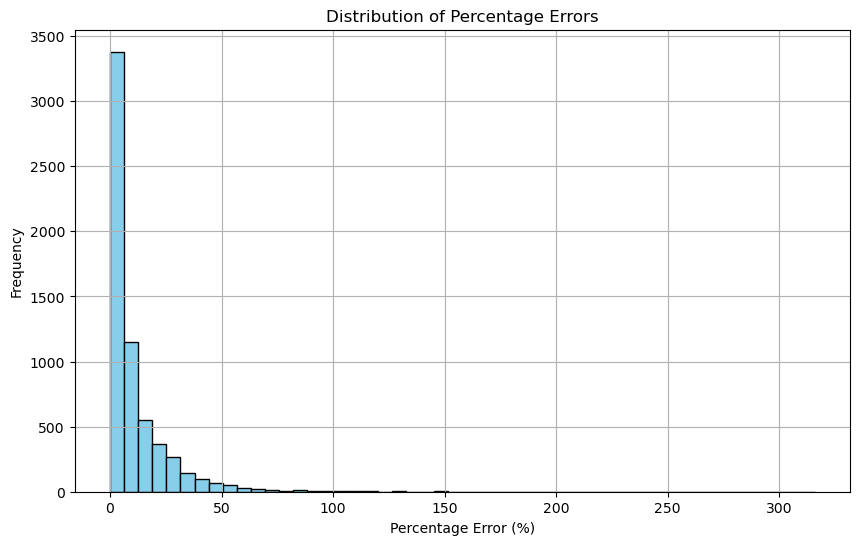


Feature Importance:
                importance    stddev       p_value  n  p99_high   p99_low
area              5.598706  0.073723  3.607004e-09  5  5.750503  5.446909
timestamp         5.322324  0.073009  4.247822e-09  5  5.472650  5.171998
temperature       4.483050  0.063063  4.697688e-09  5  4.612898  4.353201
wind_speed        0.673139  0.029942  4.685364e-07  5  0.734791  0.611488
cloud_fraction    0.503317  0.029003  1.317308e-06  5  0.563036  0.443599
precipitation     0.172484  0.010950  1.939006e-06  5  0.195031  0.149937


<Figure size 1200x800 with 0 Axes>

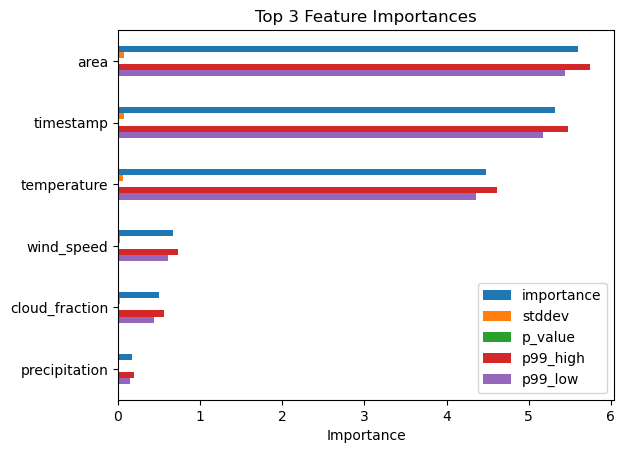

In [ ]:
import numpy as np
# Reset index if needed
test_data = test_data.reset_index(drop=True)

# Compute SMAPE witch means Symmetric Mean Absolute Percentage Error
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_values = np.where(denominator != 0, diff / denominator, 0)
    return np.mean(smape_values) * 100

# Replace 'target_column' with your actual target column name
y_true = test_data[target]
y_pred = predictor.predict(test_data)
smape_value = smape(y_true, y_pred)
print(f"\nSMAPE: {smape_value:.2f}%")

# Analyze percent-wise errors
percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
percentage_errors = np.where(y_true != 0, percentage_errors, 0)

mean_percentage_error = np.mean(percentage_errors)
median_percentage_error = np.median(percentage_errors)
max_percentage_error = np.max(percentage_errors)

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")
print(f"Max Percentage Error: {max_percentage_error:.2f}%")

# Plot percentage error distribution
plt.figure(figsize=(10, 6))
plt.hist(percentage_errors, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')
plt.grid(True)
plt.show()

# Feature Importance
# global_importance = predictor.feature_importance(test_data)

print("\nFeature Importance:")
print(global_importance)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
# remove the n from the golbal_importance plot
global_importance.columns
# Index(['importance'	'stddev'	'p_value'	'n'	'p99_high'	'p99_low']	dtype='object')

if 'n' in global_importance.columns:
    global_importance = global_importance.drop(columns=['n'])
global_importance.head(20).plot(kind='barh')

plt.xlabel('Importance')
plt.title('Top 3 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Optional: SHAP Values for advanced insights
# explainer = predictor.explain(test_data, model='best')
# explainer.plot_feature_importance()


In [21]:
import numpy as np
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_values = np.where(denominator != 0, diff / denominator, 0)
    return np.mean(smape_values) * 100

# %%
# Add the 'building' column back to the test data
test_data_with_building = test_data.copy()
test_data_with_building['building'] = test_data0['building'].values

# Ensure that the indices align correctly
test_data_with_building = test_data_with_building.reset_index(drop=True)

# %%
from sklearn.metrics import mean_absolute_error

# Define the buildings to evaluate
buildings = ['A', 'B', 'C']

# Initialize lists to store results
results = []

# Loop through each building
for building in buildings:
    # Filter test data for the current building
    building_data = test_data_with_building[test_data_with_building['building'] == "building " +building]
    
    # Get true values and predictions
    y_true = building_data[target]
    y_pred = predictor.predict(building_data[features])
    
    # Compute MAE
    mae = mean_absolute_error(y_true, y_pred)
    
    # Compute SMAPE
    smape_value = smape(y_true, y_pred)
    
    # Compute mean target value
    mean_target_value = y_true.mean()
    
    # Append results
    results.append({
        'Building': building,
        'Mean Target Value': mean_target_value,
        'MAE': mae,
        'SMAPE (%)': smape_value
    })

# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


  Building  Mean Target Value       MAE  SMAPE (%)
0        A          33.355925  3.062852   9.404621
1        B          28.170931  3.499950  13.978174
2        C          42.766271  3.320529   8.039652
